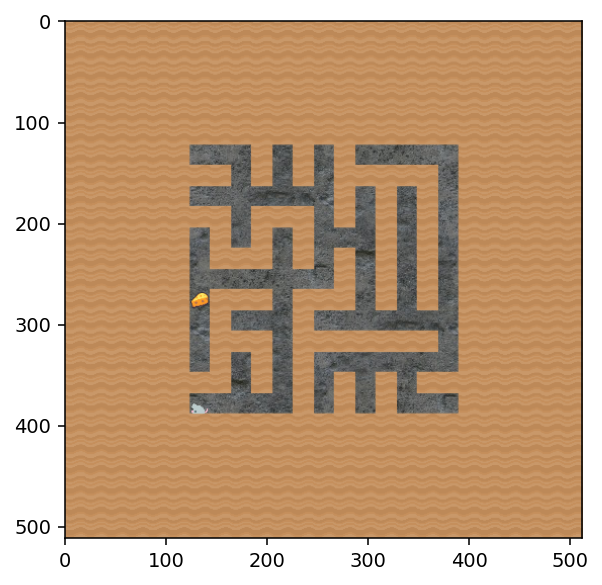

array([[[201, 152, 105],
        [201, 152, 105],
        [201, 152, 105],
        ...,
        [201, 152, 105],
        [201, 152, 105],
        [201, 152, 105]],

       [[201, 152, 105],
        [151, 128, 101],
        [134, 123, 108],
        ...,
        [132, 119, 104],
        [157, 132, 106],
        [201, 152, 105]],

       [[189, 137,  88],
        [128, 117, 101],
        [105, 109, 108],
        ...,
        [ 98, 100,  97],
        [123, 109,  96],
        [201, 152, 105]],

       ...,

       [[201, 152, 105],
        [109, 111, 110],
        [103, 107, 106],
        ...,
        [111, 113, 112],
        [124, 111,  96],
        [201, 152, 105]],

       [[201, 152, 105],
        [148, 127, 106],
        [139, 128, 115],
        ...,
        [132, 119, 103],
        [159, 134, 107],
        [201, 152, 105]],

       [[201, 152, 105],
        [201, 152, 105],
        [201, 152, 105],
        ...,
        [200, 151, 104],
        [201, 152, 105],
        [201, 152, 105]]

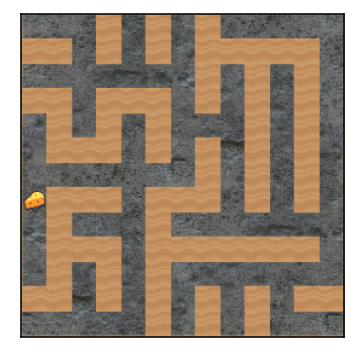

In [4]:
import matplotlib.pyplot as plt
from procgen_tools import maze, visualization
# Create a maze environment
venv = maze.create_venv(1, start_level=0, num_levels=1)
# Parse the environment state
env_state = maze.state_from_venv(venv, 0)
# Display state values
# print(env_state.state_vals.keys())
# Show a rendering of the first
venv.reset()
render = venv.render(mode='rgb_array')
plt.imshow(render)
plt.show()

visualization.visualize_venv(
    venv,
    mode="human",
    render_padding=False,
    render_mouse=False,
    show_plot=False,
)

I want to visualize an environment of a specific seed without padding. What's the correct API call for that?
I believe it should be visualize_venv(venv, mode="human", render_padding=False, render_mouse=False, show_plot=False). The venv should be seeded with the desired seed before calling visualize_venv.



In [ ]:
# Create a maze environment with a specific seed
venv = maze.create_venv(1, start_level=0, num_levels=1) #how to insert seed?

I want to take a vector field of activations and filter it to get the most probable path.
First, get the vector field.

{'arrows': [[(0.0, -0.01310374028980732), (-0.00878511555492878, 0.0), (0.008842913433909416, 0.0), (0.0, 0.8988661766052246), (0.0, 0.0)], [(0.0, -0.010067489929497242), (-0.006315746810287237, 0.0), (0.005859983619302511, 0.0), (0.0, 0.9042559862136841), (0.0, 0.0)], [(0.0, -0.0064980206079781055), (-0.003921109717339277, 0.0), (0.0029536220245063305, 0.0), (0.0, 0.9140856266021729), (0.0, 0.0)], [(0.0, -0.006422342732548714), (-0.003545827232301235, 0.0), (0.0027411894407123327, 0.0), (0.0, 0.9163831472396851), (0.0, 0.0)], [(0.0, -0.020231718197464943), (-0.00452122138813138, 0.0), (0.8628240823745728, 0.0), (0.0, 0.02059882879257202), (0.0, 0.0)], [(0.0, -0.027804924175143242), (-0.0228587593883276, 0.0), (0.8690242767333984, 0.0), (0.0, 0.03154280409216881), (0.0, 0.0)], [(0.0, -0.021659865975379944), (-0.016057822853326797, 0.0), (0.8975448608398438, 0.0), (0.0, 0.025000590831041336), (0.0, 0.0)], [(0.0, -0.03224562853574753), (-0.008282579481601715, 0.0), (0.8841633796691895, 0

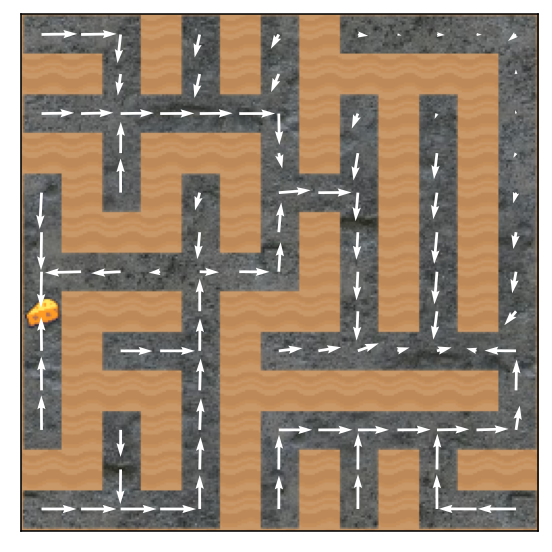

In [6]:
import torch as t
from procgen_tools import maze, vfield, models

# Load pretrained policy
policy = models.load_policy('trained_models/maze_I/model_rand_region_5.pth', 15, t.device('cpu'))
venv = maze.create_venv(1, start_level=0, num_levels=1)
vf_original = vfield.vector_field(venv, policy)
vfield.plot_vf(vf_original)

print(vf_original)

#plt.show()

Alright so the vf is made up of a grid, arrows, and probabilities (which presumably scale the arrows).
Here's how I think I will filter the vector field to get the MPP:
    1. Make the arrows point either up down left or right for pathfinding. Don't need to show all the smallest angles for finding the MPP.
    2. I think the arrows are already filtered by possibilities.
    3. From the starting position, just follow the largest arrows until you return somewhere you've already been - this is necessarily the end due to there not being any loops.

So first, let me figure out how the grid cells are going to be so I can run through them.